In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# Read inputs
# Make sure you capture the data first and get an "pose_data.csv" file
df = pd.read_csv("x_test_1.csv", sep = ',', usecols=range(1,34))
df

,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,RIGHT_EAR,MOUTH_LEFT,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
0,x: 235.31213\ny: 282.56314\nz: -0.27665094\nvi...,x: 237.49933\ny: 276.33398\nz: -0.25813714\nvi...,x: 238.71918\ny: 276.55292\nz: -0.25814694\nvi...,x: 239.90561\ny: 276.7477\nz: -0.25815538\nvis...,x: 233.37804\ny: 275.57147\nz: -0.2610832\nvis...,x: 231.77745\ny: 275.40924\nz: -0.26108348\nvi...,x: 230.14604\ny: 275.33755\nz: -0.2610981\nvis...,x: 240.88382\ny: 281.19446\nz: -0.14079048\nvi...,x: 226.89545\ny: 279.76825\nz: -0.1582013\nvis...,x: 237.01077\ny: 290.66873\nz: -0.23275347\nvi...,...,x: 243.29112\ny: 443.44\nz: 0.0038476991\nvisi...,x: 221.13118\ny: 443.30396\nz: -0.0040039443\n...,x: 245.1502\ny: 527.47595\nz: 0.0013165954\nvi...,x: 218.41347\ny: 528.7913\nz: -0.009766875\nvi...,x: 247.101\ny: 606.46857\nz: 0.19344857\nvisib...,x: 214.66878\ny: 602.42926\nz: 0.20555845\nvis...,x: 243.09549\ny: 617.8528\nz: 0.20585962\nvisi...,x: 218.45073\ny: 612.02954\nz: 0.21907136\nvis...,x: 258.5258\ny: 628.2465\nz: 0.08684245\nvisib...,x: 209.57379\ny: 625.8168\nz: 0.10123776\nvisi...
1,x: 235.31213\ny: 282.56314\nz: -0.27665094\nvi...,x: 237.49933\ny: 276.33398\nz: -0.25813714\nvi...,x: 238.71918\ny: 276.55292\nz: -0.25814694\nvi...,x: 239.90561\ny: 276.7477\nz: -0.25815538\nvis...,x: 233.37804\ny: 275.57147\nz: -0.2610832\nvis...,x: 231.77745\ny: 275.40924\nz: -0.26108348\nvi...,x: 230.14604\ny: 275.33755\nz: -0.2610981\nvis...,x: 240.88382\ny: 281.19446\nz: -0.14079048\nvi...,x: 226.89545\ny: 279.76825\nz: -0.1582013\nvis...,x: 237.01077\ny: 290.66873\nz: -0.23275347\nvi...,...,x: 243.29112\ny: 443.44\nz: 0.0038476991\nvisi...,x: 221.13118\ny: 443.30396\nz: -0.0040039443\n...,x: 245.1502\ny: 527.47595\nz: 0.0013165954\nvi...,x: 218.41347\ny: 528.7913\nz: -0.009766875\nvi...,x: 247.101\ny: 606.46857\nz: 0.19344857\nvisib...,x: 214.66878\ny: 602.42926\nz: 0.20555845\nvis...,x: 243.09549\ny: 617.8528\nz: 0.20585962\nvisi...,x: 218.45073\ny: 612.02954\nz: 0.21907136\nvis...,x: 258.5258\ny: 628.2465\nz: 0.08684245\nvisib...,x: 209.57379\ny: 625.8168\nz: 0.10123776\nvisi...
2,x: 235.15689\ny: 282.5262\nz: -0.2593451\nvisi...,x: 237.3228\ny: 276.15512\nz: -0.24007797\nvis...,x: 238.57887\ny: 276.37885\nz: -0.24008588\nvi...,x: 239.82532\ny: 276.58026\nz: -0.24008465\nvi...,x: 233.29814\ny: 275.516\nz: -0.24466121\nvisi...,x: 231.74187\ny: 275.37997\nz: -0.24463806\nvi...,x: 230.14412\ny: 275.31738\nz: -0.24462816\nvi...,x: 240.88927\ny: 281.0235\nz: -0.12148972\nvis...,x: 226.9373\ny: 279.61862\nz: -0.14422582\nvis...,x: 236.94511\ny: 290.66705\nz: -0.21484807\nvi...,...,x: 243.51144\ny: 443.43958\nz: 0.0074797766\nv...,x: 221.14838\ny: 443.30203\nz: -0.0076476038\n...,x: 245.00673\ny: 527.42413\nz: 0.017675731\nvi...,x: 218.57684\ny: 528.1122\nz: 0.0061590225\nvi...,x: 247.14085\ny: 606.08997\nz: 0.17755277\nvis...,x: 214.65533\ny: 602.20026\nz: 0.1837015\nvisi...,x: 243.13689\ny: 617.3954\nz: 0.18590786\nvisi...,x: 218.1536\ny: 611.8252\nz: 0.19247079\nvisib...,x: 258.49118\ny: 627.8902\nz: 0.065622464\nvis...,x: 209.58673\ny: 625.8197\nz: 0.071432665\nvis...
3,x: 235.15689\ny: 282.5262\nz: -0.2593451\nvisi...,x: 237.3228\ny: 276.15512\nz: -0.24007797\nvis...,x: 238.57887\ny: 276.37885\nz: -0.24008588\nvi...,x: 239.82532\ny: 276.58026\nz: -0.24008465\nvi...,x: 233.29814\ny: 275.516\nz: -0.24466121\nvisi...,x: 231.74187\ny: 275.37997\nz: -0.24463806\nvi...,x: 230.14412\ny: 275.31738\nz: -0.24462816\nvi...,x: 240.88927\ny: 281.0235\nz: -0.12148972\nvis...,x: 226.9373\ny: 279.61862\nz: -0.14422582\nvis...,x: 236.94511\ny: 290.66705\nz: -0.21484807\nvi...,...,x: 243.51144\ny: 443.43958\nz: 0.0074797766\nv...,x: 221.14838\ny: 443.30203\nz: -0.0076476038\n...,x: 245.00673\ny: 527.42413\nz: 0.017675731\nvi...,x: 218.57684\ny: 528.1122\nz: 0.0061590225\nvi...,x: 247.14085\ny: 606.08997\nz: 0.17755

In [3]:
# Function to parse the string
def split_ele(x):
    a = np.array(re.findall(r"[-+]?\d*\.?\d+|[-+]?\d+", x))
    return a.astype(np.float)

In [4]:
pose_landmark = ['NOSE', 'LEFT_EYE_INNER', 'LEFT_EYE', 'LEFT_EYE_OUTER', 'RIGHT_EYE_INNER', 'RIGHT_EYE', 'RIGHT_EYE_OUTER', 'LEFT_EAR', 'RIGHT_EAR', 'MOUTH_LEFT', 'MOUTH_RIGHT',
              'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW', 'LEFT_WRIST', 'RIGHT_WRIST', 'LEFT_PINKY', 'RIGHT_PINKY', 'LEFT_INDEX', 'RIGHT_INDEX', 'LEFT_THUMB',
              'RIGHT_THUMB', 'LEFT_HIP', 'RIGHT_HIP', 'LEFT_KNEE', 'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_HEEL', 'RIGHT_HEEL', 'LEFT_FOOT_INDEX', 'RIGHT_FOOT_INDEX']

#### Input the corresponding number of the body joints you want to plot:

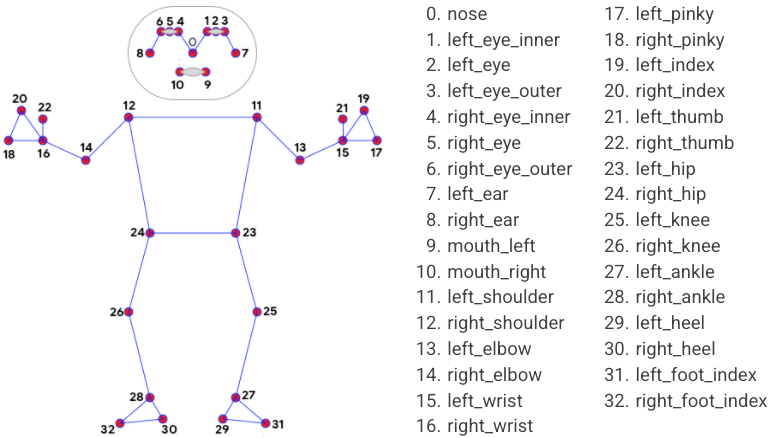

In [5]:
display.Image("./pose_tracking_full_body_landmarks.png")

In [6]:
# input the number and press enter
body_index = input()
print(pose_landmark[int(body_index)])

4
RIGHT_EYE_INNER


In [7]:
# Parse the column from df
body_col = df[pose_landmark[int(body_index)]].values

In [8]:
# Convert string to array
body_arr = [split_ele(x) for x in body_col]
# Check the first one
body_arr[0]

C:\Users\mbase\AppData\Local\Temp/ipykernel_21400/3449465477.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return a.astype(np.float)


array([ 2.3337804e+02,  2.7557147e+02, -2.6108320e-01,  9.9999166e-01])

In [9]:
# value x in the first element
body_arr[0][0]

233.37804

In [10]:
# Get the x,y,z value array
body_arr_x = []
body_arr_y = []
body_arr_z = []
for i in range(len(body_arr)):
    body_arr_x = np.append(body_arr_x,body_arr[i][0])
    body_arr_y = np.append(body_arr_y,body_arr[i][1])
    body_arr_z = np.append(body_arr_y,body_arr[i][2])

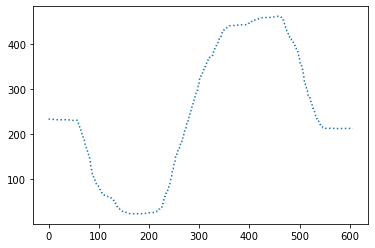

In [11]:
# Plot x
plt.plot(body_arr_x, linestyle = 'dotted')
plt.show()

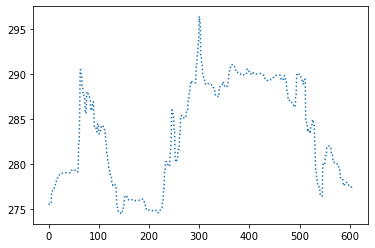

In [12]:
# Plot y
plt.plot(body_arr_y, linestyle = 'dotted')
plt.show()

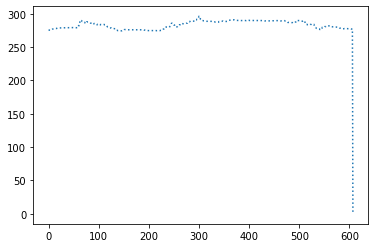

In [13]:
# Plot z
plt.plot(body_arr_z, linestyle = 'dotted')
plt.show()

In [15]:
#can skip numbers: 0-6,9,10?
#x range = 0-440

extracted_features_x = ['NOSE_std', 'LEFT_EYE_INNER_std', 'LEFT_EYE_std', 'LEFT_EYE_OUTER_std', 'RIGHT_EYE_INNER_std', 'RIGHT_EYE_std', 'RIGHT_EYE_OUTER_std', 'LEFT_EAR_std', 'RIGHT_EAR_std', 'MOUTH_LEFT_std', 'MOUTH_RIGHT_std',
              'LEFT_SHOULDER_std', 'RIGHT_SHOULDER_std', 'LEFT_ELBOW_std', 'RIGHT_ELBOW_std', 'LEFT_WRIST_std', 'RIGHT_WRIST_std', 'LEFT_PINKY_std', 'RIGHT_PINKY_std', 'LEFT_INDEX_std', 'RIGHT_INDEX_std', 'LEFT_THUMB_std',
              'RIGHT_THUMB_std', 'LEFT_HIP_std', 'RIGHT_HIP_std', 'LEFT_KNEE_std', 'RIGHT_KNEE_std', 'LEFT_ANKLE_std', 'RIGHT_ANKLE_std', 'LEFT_HEEL_std', 'RIGHT_HEEL_std', 'LEFT_FOOT_INDEX_std', 'RIGHT_FOOT_INDEX_std']

frame_length = 10

#EDIT THIS TO MATCH ACTUAL DATASETS. here choose 120 since there are 125 datapoints and 10 datapoints per second of movement
numframes = 60

xtrain = pd.DataFrame(columns=extracted_features_x)
for curr_ind in range(numframes):
    feat_list = [None] * 33
    for body_index in range(33):
        body_col = df[pose_landmark[int(body_index)]][curr_ind:curr_ind+frame_length]
        body_col = body_col.values
        body_arr = [split_ele(x) for x in body_col]
        body_arr_x = []
        for i in range(len(body_arr)):
            body_arr_x = np.append(body_arr_x,body_arr[i][0])
        feat_list[body_index] = np.std(body_arr_x)
    xtrain.loc[curr_ind] = ""
    xtrain.loc[curr_ind] = feat_list

C:\Users\mbase\AppData\Local\Temp/ipykernel_21400/3449465477.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return a.astype(np.float)


In [17]:
xtrain

,NOSE_std,LEFT_EYE_INNER_std,LEFT_EYE_std,LEFT_EYE_OUTER_std,RIGHT_EYE_INNER_std,RIGHT_EYE_std,RIGHT_EYE_OUTER_std,LEFT_EAR_std,RIGHT_EAR_std,MOUTH_LEFT_std,...,LEFT_HIP_std,RIGHT_HIP_std,LEFT_KNEE_std,RIGHT_KNEE_std,LEFT_ANKLE_std,RIGHT_ANKLE_std,LEFT_HEEL_std,RIGHT_HEEL_std,LEFT_FOOT_INDEX_std,RIGHT_FOOT_INDEX_std
0,0.396885,0.367656,0.327962,0.318528,0.252606,0.22221,0.195773,0.141732,0.130909,0.356572,...,0.125933,0.060049,0.13095,0.088285,0.049691,0.012433,0.026565,0.223743,0.032951,0.088077
1,0.41766,0.387269,0.354832,0.35874,0.283967,0.25253,0.231654,0.226779,0.178382,0.401657,...,0.100439,0.075771,0.125962,0.074882,0.049844,0.010861,0.021996,0.204198,0.029312,0.137514
2,0.403126,0.371531,0.348268,0.365687,0.288854,0.261346,0.247388,0.269803,0.204879,0.411301,...,0.059091,0.085225,0.104151,0.041961,0.043767,0.007562,0.012194,0.149249,0.024881,0.159416
3,0.436461,0.407441,0.389845,0.410336,0.335807,0.303499,0.292436,0.352421,0.243491,0.454586,...,0.063869,0.093939,0.106735,0.042063,0.047964,0.006091,0.010788,0.138239,0.036842,0.169886
4,0.420174,0.395955,0.385386,0.408602,0.343098,0.311107,0.304874,0.390672,0.257979,0.448547,...,0.06807,0.096539,0.096999,0.037369,0.045062,0.002747,0.007148,0.107995,0.044806,0.165913
5,0.399511,0.380866,0.373827,0.395323,0.337651,0.304237,0.297273,0.402563,0.259495,0.432535,...,0.067358,0.09364,0.092829,0.035693,0.060474,0.002578,0.013821,0.10279,0.060324,0.166613
6,0.327658,0.321117,0.32149,0.338944,0.296332,0.263357,0.257635,0.383811,0.237935,0.365845,...,0.062453,0.084247,0.078636,0.030893,0.066439,0.002244,0.0165,0.088233,0.068559,0.154115
7,0.346811,0.342847,0.33948,0.345273,0.305846,0.267982,0.254233,0.367283,0.217992,0.362765,...,0.053243,0.074433,0.06994,0.034521,0.090043,0.00183,0.027578,0.077059,0.0721,0.144731
8,0.326935,0.323875,0.317812,0.31191,0.281386,0.243296,0.222992,0.314034,0.170013,0.319423,...,0.033989,0.047725,0.051891,0.033328,0.100111,0.001228,0.032961,0.05529,0.070809,0.124304
9,0.325714,0.32631,0.314929,0.301806,0.277241,0.240216,0.215765,0.274702,0.15422,0.302222,...,0.028449,0.047289,0.044304,0.036502,0.117859,0.004141,0.045777,0.04269,0.071241,0.095942


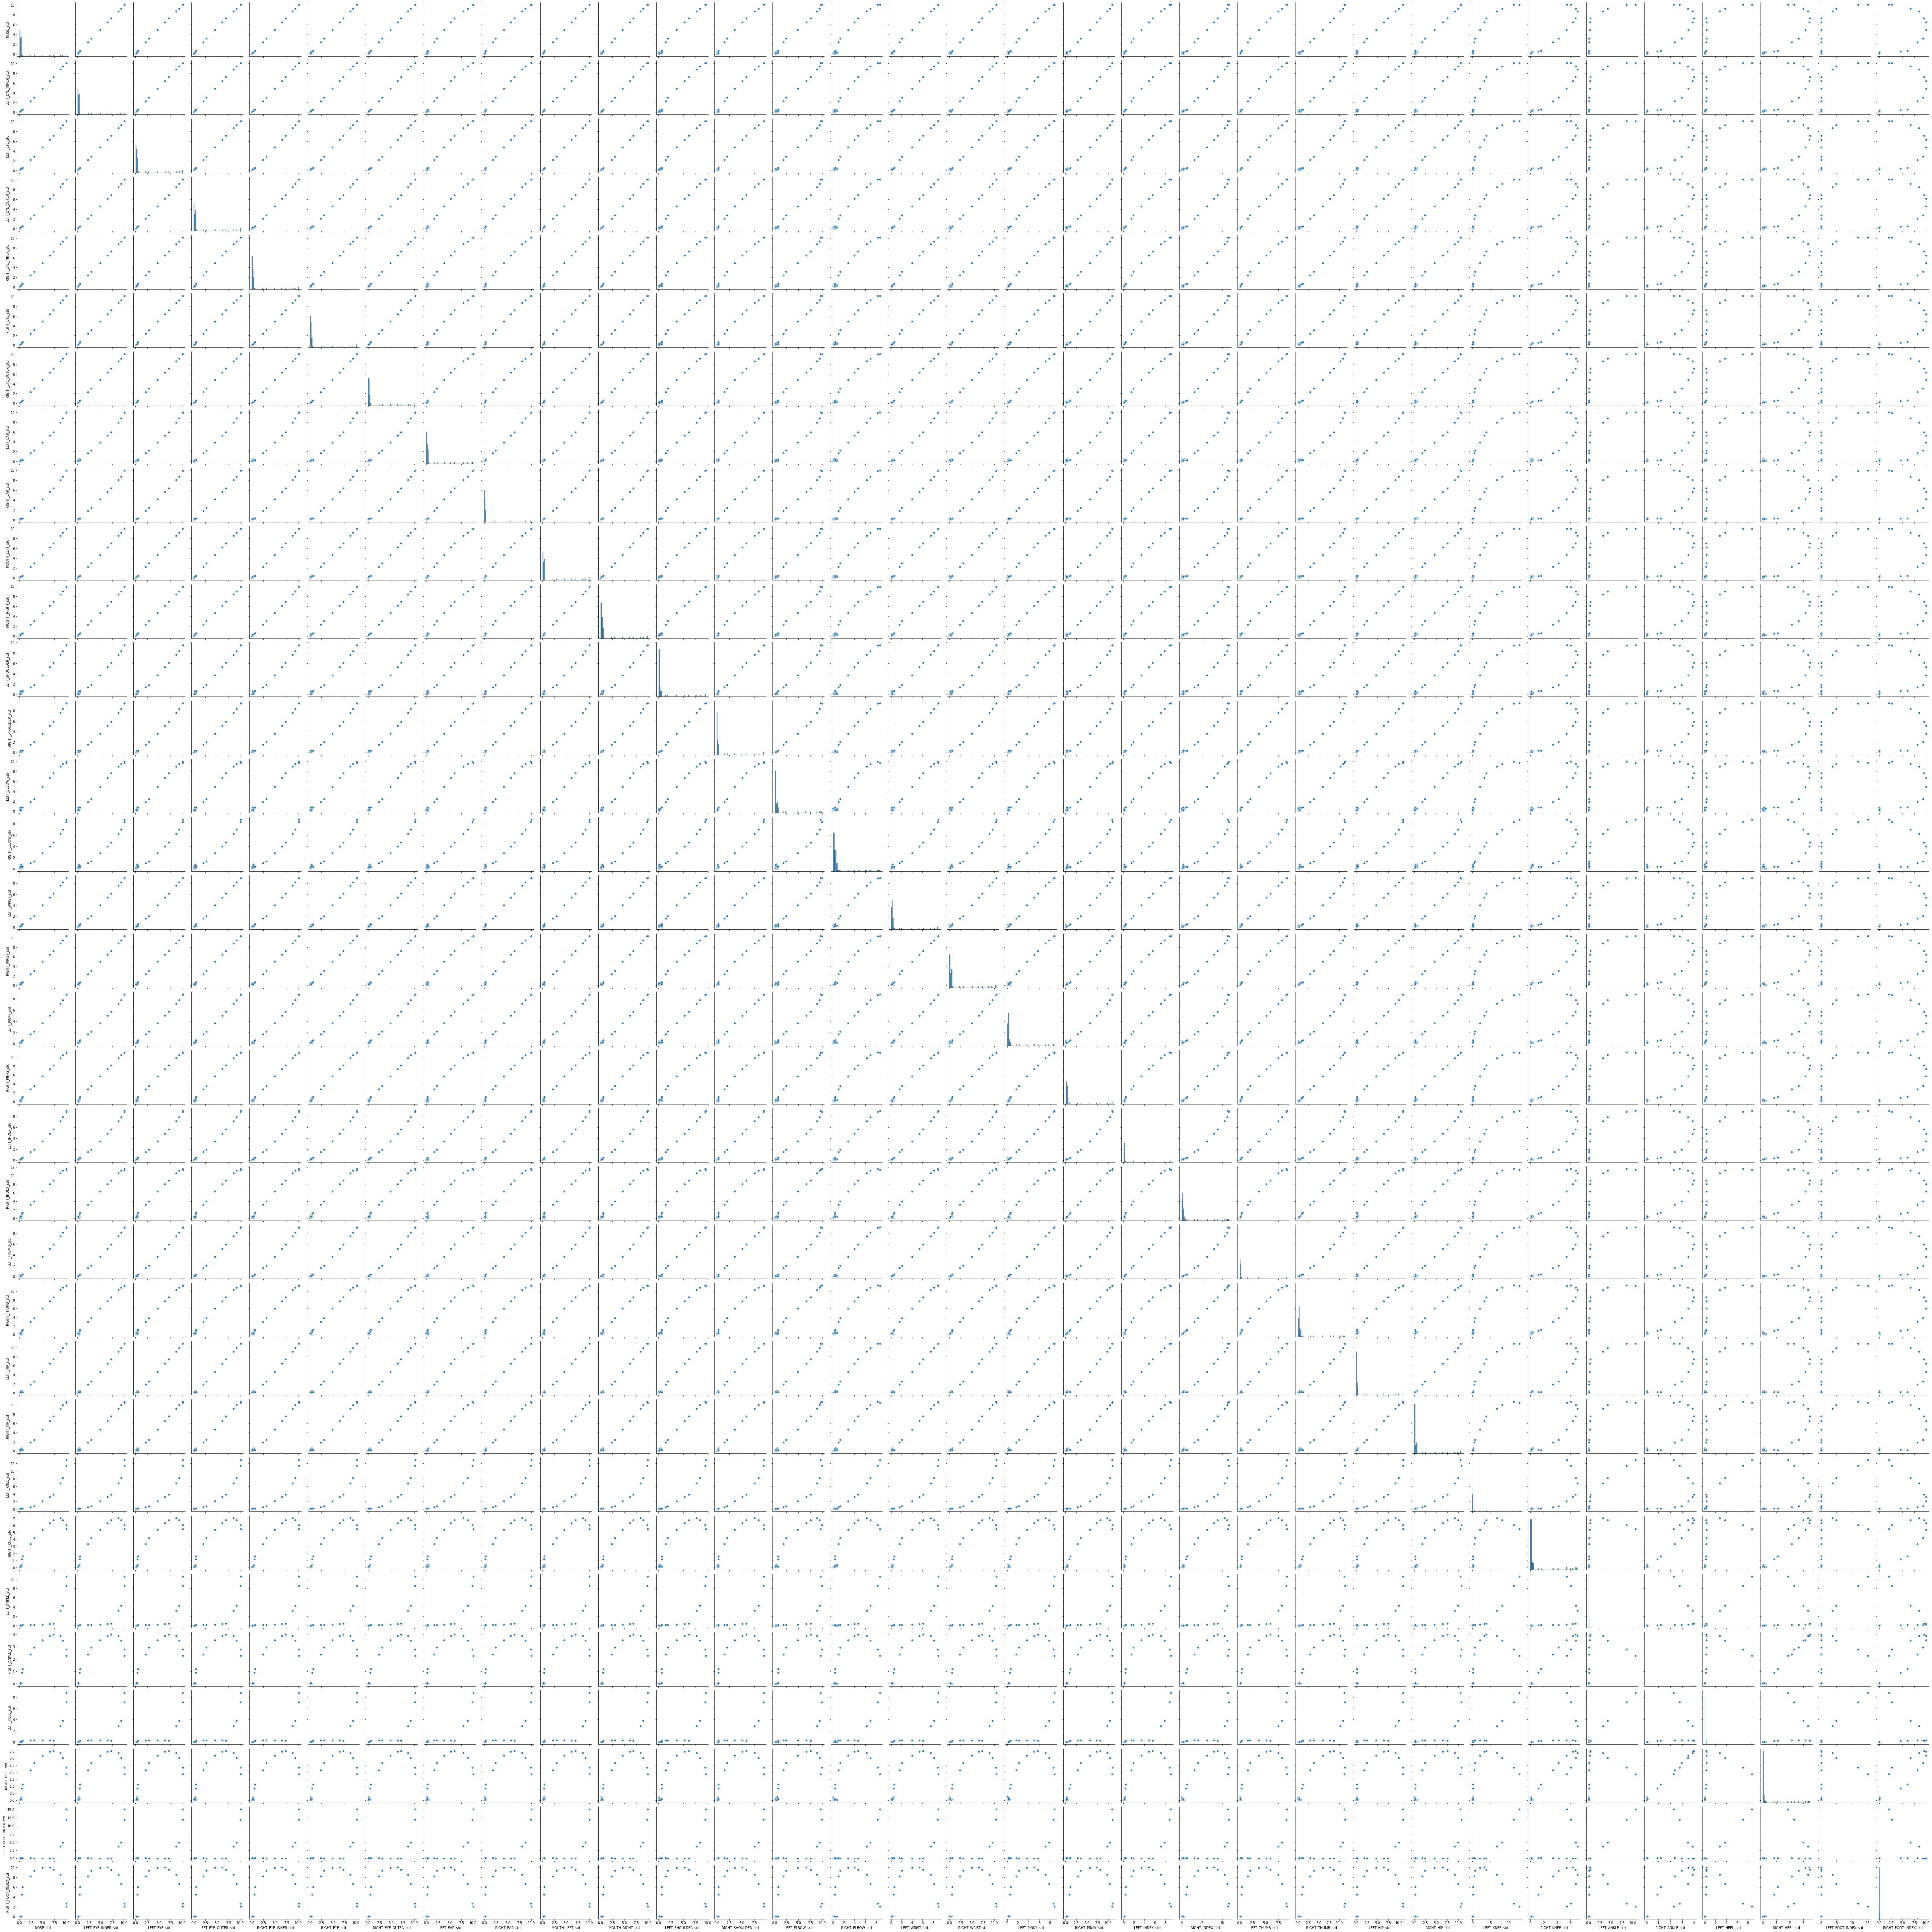

In [16]:
import seaborn as sns
sns.pairplot(xtrain)